## DATA CLEANING AND EDA 1

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

In [2]:
df = pd.read_pickle("project2_data/SFproperty_df")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     1182 non-null   object
 1   Location    1182 non-null   object
 2   Price       1182 non-null   object
 3   Beds        1182 non-null   object
 4   Baths       1182 non-null   object
 5   Sq.Ft.      1182 non-null   object
 6   $/Sq.Ft.    1182 non-null   object
 7   On Redfin   1182 non-null   object
 8   HOA         1182 non-null   object
 9   Year Built  1182 non-null   object
 10  Lot Size    1182 non-null   object
 11  Date Sold   1182 non-null   object
 12  Zip Code    1182 non-null   object
 13  prop_type   1182 non-null   object
dtypes: object(14)
memory usage: 129.4+ KB


### Check the dataset: <br> (1) Convert data to appropriate types <br> (2) Check out records that don't seem to make sense

In [4]:
# check for duplicates(2 of them) and drop the record with less info
df["Address"].duplicated().sum()
df[df["Address"].duplicated()]
print(df[df["Address"] == "2031 Hayes St"])
df.drop_duplicates(subset = ["Address"], inplace = True)

           Address              Location       Price Beds Baths Sq.Ft.  \
599  2031 Hayes St  San Francisco County  $1,800,000    3   2.5  1,670   
698  2031 Hayes St                        $1,800,000    3     3      —   

    $/Sq.Ft. On Redfin   HOA Year Built Lot Size     Date Sold  \
599   $1,078  163 days  None       1910        —  AUG 10, 2020   
698        —         —  None       1910        —  AUG 10, 2020   

                Zip Code prop_type  
599  2031-Hayes-St-94117     condo  
698  2031-Hayes-St-94117     condo  


In [5]:
# double checking after duplicate removal
df.groupby(["Address", "Zip Code"])["Address"].count().sort_values(ascending = False).head()

Address             Zip Code              
1 Burnett Ave N #3  1-Burnett-Ave-N-94131     1
4031 Cabrillo St    4031-Cabrillo-St-94121    1
42 August Aly       42-August-Aly-94133       1
418 Ellsworth St    418-Ellsworth-St-94110    1
416 Broderick St    416-Broderick-St-94117    1
Name: Address, dtype: int64

In [6]:
# convert Date Sold to datetime object
df["Date Sold"] = pd.to_datetime(df["Date Sold"])
df["Date Sold"].value_counts().sort_index()
df["Date Sold"].value_counts()

2020-08-21    17
2020-12-01    15
2020-11-13    14
2020-12-11    14
2020-10-23    14
              ..
2020-04-10     1
2020-04-21     1
2020-03-18     1
2020-05-13     1
2020-03-10     1
Name: Date Sold, Length: 238, dtype: int64

In [7]:
# removing symbols in house Price
df["Price"] = ["".join(p.strip("$").split(",")) for p in df["Price"]]

# convert Price to numbers and check for missing values
df["Price"] = pd.to_numeric(df["Price"])

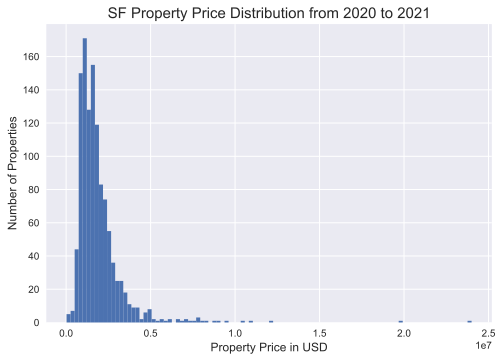

In [8]:
# look at property price distribution (Note: right skewed distribution)
# plt.rcParams["figure.figsize"] = [5,3]
# plt.rcParams["figure.dpi"] = 200
plt.hist(df["Price"], bins = 100)
plt.title("SF Property Price Distribution from 2020 to 2021", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Property Price in USD", fontsize = 12);
#plt.savefig("project2_images/histogram_property_price.png");

In [9]:
# # seaborn histogram, with density curve
# sns.set_style("darkgrid")
# price_hist = sns.histplot(df["Price"], bins=100, kde=True)
# price_hist.set(xlabel="Number of Property", ylabel="Property Price in USD")
# plt.title("SF Property Price Distribution from 2020 to 2021", fontsize=15);

In [10]:
# check outliers, how should outliers be defined? 
# houses cost > 5mil don't seem to be particularly out of the ordinary since their sizes are huge
print(df["Price"].describe())
print(len(df[df["Price"] > 5000000]))
print(len(df[df["Price"] < 500000])) 

# df[df["Price"] > 5000000].sort_values("Price", ascending = False)

# to make notebook display less cluttered
df[df["Price"] > 5000000].sort_values("Price", ascending = False).head()

count    1.168000e+03
mean     1.897816e+06
std      1.486412e+06
min      2.700000e+04
25%      1.119250e+06
50%      1.600000e+06
75%      2.210000e+06
max      2.400000e+07
Name: Price, dtype: float64
28
11


Address         Location       Price Beds Baths  Sq.Ft.  \
147    190 Sea Cliff Ave        Sea Cliff  24000000.0    4   6.5  10,725   
81       2775 Vallejo St  Pacific Heights  19750000.0    6   6.5       —   
939     2171 Pacific Ave  Pacific Heights  12230000.0   31     —  20,818   
1051  2101 California St  Pacific Heights  11000000.0   21     —  16,076   
1104  3959 Washington St                   10500000.0    5     4       —   

     $/Sq.Ft. On Redfin   HOA Year Built       Lot Size  Date Sold  \
147    $2,238   69 days  None       1913     0.25 Acres 2020-11-12   
81          —   21 days  None       1916  6,806 Sq. Ft. 2020-12-30   
939      $587   84 days  None       1965  8,934 Sq. Ft. 2020-10-28   
1051     $684  233 days  None       1923  5,911 Sq. Ft. 2020-06-01   
1104        —         —  None       1913  3,632 Sq. Ft. 2020-10-30   

                      Zip Code  prop_type  
147    190-Sea-Cliff-Ave-94121      house  
81       2775-Vallejo-St-94123      house  
939     2171-Pacific-Ave-94115  multi_fam  
1051  2101-California-St-94115  multi_fam  
1104  3959-Washington-St-94118  multi_fam

In [11]:
# df[df["Price"] < 500000].sort_values("Price")

# to make notebook display less cluttered
df[df["Price"] < 500000].sort_values("Price").head()

Address        Location     Price Beds Baths Sq.Ft.  \
1140           2061 10th Ave                   27000.0    2     1  1,178   
638     1335 Filbert St #101    Russian Hill  187620.0    1     1    914   
444   901 Bayshore Blvd #308  Silver Terrace  196842.0    1     1    530   
1132    101 Caselli Ave #103                  201500.0    4     5      —   
1099           1157 Broadway                  214000.0    7     8      —   

     $/Sq.Ft. On Redfin         HOA Year Built       Lot Size  Date Sold  \
1140      $23         —        None       1947  3,000 Sq. Ft. 2020-07-01   
638      $205  209 days  $552/month       1924              — 2020-06-25   
444      $371   21 days  $382/month       2003              — 2020-12-30   
1132        —         —        None       1927  2,596 Sq. Ft. 2020-10-08   
1099        —         —        None       1923              — 2020-10-26   

                     Zip Code  prop_type  
1140      2061-10th-Ave-94116  multi_fam  
638     1335-Filbert-St-94109      condo  
444   901-Bayshore-Blvd-94124      condo  
1132    101-Caselli-Ave-94114  multi_fam  
1099      1157-Broadway-94109  multi_fam

#### NOTES: Try removing properties > 10mil and <200k in later analysis

In [12]:
# drop a record with Price misrecorded
df.drop(df[df["Price"] == 27000].index, inplace = True)

In [13]:
# Price distribution is right skewed, apply log transformation (now approximately normal)
log_Price = np.log(df["Price"])

plt.hist(log_Price, bins = 100)
plt.title("Distribution of Log(Property Price) from 2020 to 2021", fontsize = 13)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Property Price in Log Scale", fontsize = 12)
plt.tight_layout();
#plt.savefig("project2_images/histogram_LOG_property_price.png");

In [14]:
# check missing values in Location
# print(len(df[df["Location"] == "—"]))
print(len(df[df["Location"] == ""])) 
#191 missing values for location, but Zip Code can be used to approximate location!

191


In [15]:
# check missing values in Beds and Baths
# print(len(df[df["Beds"] == ""]))
print(len(df[df["Beds"] == "—"])) #124 obs missing values in Beds
# print(len(df[df["Baths"] == ""]))
print(len(df[df["Baths"] == "—"])) #118 obs missing values in Baths

mask = (df["Beds"] == "—") & (df["Baths"] == "—")
print(len(df[mask])) #42 obs missing both Beds and Baths

# replace "—" in both Beds and Baths with none
df["Beds"].replace({"—":None}, inplace = True)
df["Baths"].replace({"—":None}, inplace = True)

124
118
42


In [16]:
# convert Beds to integer and Baths to float
# int vs float makes a difference in interpretation
df["Beds"] = pd.to_numeric(df["Beds"]).astype("Int64")
df["Baths"] = pd.to_numeric(df["Baths"])

In [17]:
df[["Beds","Baths"]].describe()
df["Beds"].value_counts().sort_index()

0      12
1     107
2     301
3     259
4     166
5      70
6      50
7      26
8      15
9      10
10      8
11      2
12     13
14      1
16      3
18      3
20      1
21      3
22      1
24      3
28      1
31      1
Name: Beds, dtype: Int64

In [18]:
df[df["Beds"] == 0]
df["Baths"].value_counts().sort_index() #there can be 0.25 and 0.75 baths...o.O

1.00     235
1.25       5
1.50      50
1.75       3
2.00     341
2.25       3
2.50      83
2.75       1
3.00     124
3.50      55
4.00      76
4.50      15
5.00      26
5.50       6
6.00      15
6.50       3
7.00       4
7.50       1
8.00       7
9.00       1
10.00      2
12.00      3
16.00      1
19.00      1
24.00      1
Name: Baths, dtype: int64

#### Note: make sense to have 0 bed (in case of studio units), but always have >= 1 bath

In [19]:
# look at distribution of property by number of bedrooms
Beds_noNA = df[df["Beds"].notnull()]["Beds"]

plt.hist(Beds_noNA, bins = 30)
plt.title("Property Distribution by Number of Beds", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Number of Beds", fontsize = 12);

In [20]:
# check missing values in house size(Sq.Ft.)
# print(len(df[df["Sq.Ft."] == ""]))
print(len(df[df["Sq.Ft."] == "—"])) #269 obs missing values in size

# removing symbols in house size(Sq.Ft.) and replacing "—" with null
df["Sq.Ft."] = ["".join(s.split(",")) for s in df["Sq.Ft."]]
df["Sq.Ft."].replace({"—":None}, inplace = True)

269


In [21]:
# convert size to numeric
df["Sq.Ft."] = pd.to_numeric(df["Sq.Ft."])
# df["Sq.Ft."].isna().sum()

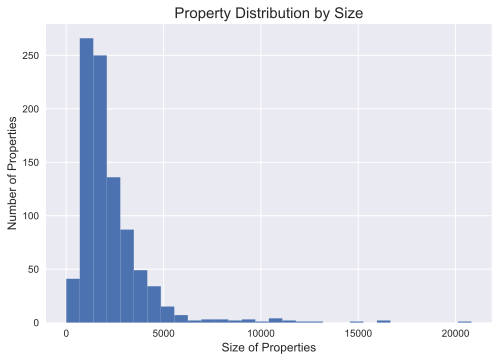

In [22]:
# look at distribution of property by size
plt.hist(df["Sq.Ft."], bins = 30)
plt.title("Property Distribution by Size", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Size of Properties", fontsize = 12);

In [23]:
# check outliers in property size
df["Sq.Ft."].describe()
df[df["Sq.Ft."] == 0] #2 listings have size 0, redfin records reported by owners

Address  Location      Price  Beds  Baths  Sq.Ft. $/Sq.Ft.  \
5      9 Rosemary Ct  Parkside  2035000.0     0    NaN     0.0        —   
146  34 West Clay St      Lake  7000000.0     0    NaN     0.0        —   

    On Redfin   HOA Year Built Lot Size  Date Sold             Zip Code  \
5     21 days  None       1962        — 2020-12-30  9-Rosemary-Ct-94116   
146   69 days  None       1912        — 2020-11-12   34-W-Clay-St-94121   

    prop_type  
5       house  
146     house

In [24]:
# remove the two records with 0 size
mask = (df["Sq.Ft."] == 0)
df.drop(df[mask].index, inplace = True)

In [25]:
# df[df["Sq.Ft."] > 10000]

# to make notebook display less cluttered
df[df["Sq.Ft."] > 10000].head()

Address         Location       Price  Beds  Baths  \
147        190 Sea Cliff Ave        Sea Cliff  24000000.0     4    6.5   
878            2028 Scott St  Pacific Heights   6250000.0    21    NaN   
905  1623-1633 California St         Nob Hill   6500000.0    10    NaN   
926             3014 Clay St  Pacific Heights   7920000.0    24    NaN   
929            25-35 Hoff St    Inner Mission   4125000.0    24    NaN   

      Sq.Ft. $/Sq.Ft. On Redfin   HOA Year Built       Lot Size  Date Sold  \
147  10725.0   $2,238   69 days  None       1913     0.25 Acres 2020-11-12   
878  11493.0     $544   14 days  None       1966  5,292 Sq. Ft. 2021-01-06   
905  15052.0     $432   40 days  None       1923  6,873 Sq. Ft. 2020-12-11   
926  12375.0     $640   72 days  None       1963  6,381 Sq. Ft. 2020-11-09   
929  16470.0     $250   75 days  None       1907  7,361 Sq. Ft. 2020-11-06   

                     Zip Code  prop_type  
147   190-Sea-Cliff-Ave-94121      house  
878       2028-Scott-St-94115  multi_fam  
905  1623-California-St-94109  multi_fam  
926        3014-Clay-St-94115  multi_fam  
929          25-Hoff-St-94110  multi_fam

In [26]:
# size has right skewed distribution, log transform (approximately normal after transformation)
plt.hist(np.log(df["Sq.Ft."]), bins = 30)
plt.title("Log Property Distribution by Size", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Log Size of Properties", fontsize = 12);

In [27]:
# check missing values in HOA
# print(len(df[df["HOA"] == "—"]))
print(len(df[df["HOA"] == ""])) #13 missing value in HOA
df["HOA"].value_counts() 

# turn HOA into numeric
df["HOA"] = ["".join(h.split("/")[0].strip("$").split(",")) for h in df["HOA"]]
df["HOA"].replace({"None":"0"}, inplace = True)
df["HOA"] = pd.to_numeric(df["HOA"])
#df["HOA"].value_counts()

13


In [28]:
# check missing values in Year Built
# print(len(df[df["Year Built"] == ""]))
print(len(df[df["Year Built"] == "—"])) #48 missing values in Year Built
df["Year Built"].replace({"—":None}, inplace = True)

# convert Year Built to integers
df["Year Built"] = pd.to_numeric(df["Year Built"]).astype("Int64")
df["Year Built"].value_counts().sort_index(ascending = False)
df["Year Built"].isna().sum()

48


48

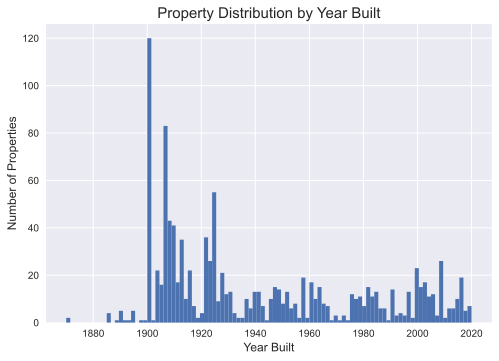

In [29]:
# look at distribution of Year Built
YB_noNA = df[df["Year Built"].notnull()]["Year Built"]
plt.hist(YB_noNA, bins = 100)
plt.title("Property Distribution by Year Built", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Year Built", fontsize = 12);

In [30]:
# check missing values in Lot Size and Date Sold
# print(len(df[df["Lot Size"] == ""]))
print(len(df[df["Lot Size"] == "—"])) #503 missing values in LotSize, likely to be missing for condos

print(len(df[df["Date Sold"] == "—"]))
print(len(df[df["Date Sold"] == ""])) #0 missing values in Date Sold, should divide in month and year

503
0
0


In [31]:
# extract the year and month from Date Sold
df["year_sold"] = pd.DatetimeIndex(df["Date Sold"]).year
df["month_sold"] = pd.DatetimeIndex(df["Date Sold"]).month

In [32]:
# check missing values in Zip Code
print(len(df[df["Zip Code"] == "—"]))
print(len(df[df["Zip Code"] == ""])) #0 missing values in Zip Code, need to extract Zip Code from of the string

#extrac zip code from the string
df["Zip Code"] = [zip.split("-")[-1] for zip in df["Zip Code"]]
df["Zip Code"].value_counts()

0
0


94110    130
94109    116
94114    101
94117     87
94121     84
94122     75
94112     73
94118     72
94131     69
94115     61
94107     55
94123     41
94133     40
94103     36
94124     31
94102     30
94134     20
94132     19
94116     11
94127     10
94105      5
94108      5
94158      4
94111      2
94014      1
Name: Zip Code, dtype: int64

In [33]:
# one zip code (one listing) maps to Daly City, delete record
df.drop(df[df["Zip Code"] == "94014"].index, inplace = True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 0 to 1181
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Address     1177 non-null   object        
 1   Location    1177 non-null   object        
 2   Price       1164 non-null   float64       
 3   Beds        1053 non-null   Int64         
 4   Baths       1061 non-null   float64       
 5   Sq.Ft.      908 non-null    float64       
 6   $/Sq.Ft.    1177 non-null   object        
 7   On Redfin   1177 non-null   object        
 8   HOA         1164 non-null   float64       
 9   Year Built  1129 non-null   Int64         
 10  Lot Size    1177 non-null   object        
 11  Date Sold   1177 non-null   datetime64[ns]
 12  Zip Code    1177 non-null   object        
 13  prop_type   1177 non-null   object        
 14  year_sold   1177 non-null   int64         
 15  month_sold  1177 non-null   int64         
dtypes: Int64(2), datetime64[

In [35]:
df.to_pickle("/Users/sarazzzz/Desktop/Metis/CAMP/Metis_project2/project2_data/prop_cleaned_r1")